### Start-up

In [2]:
%run cubes_e2e_refresh.py
#%matplotlib notebook

### Input spectra

Sky spectrum created and saved in SkyCalc_input_NEW_Out.fits.
Photons collected.
Input spectra created.
Sky spectrum imported from SkyCalc_input_NEW_Out.fits.


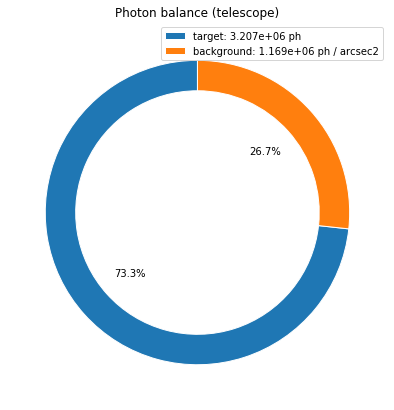

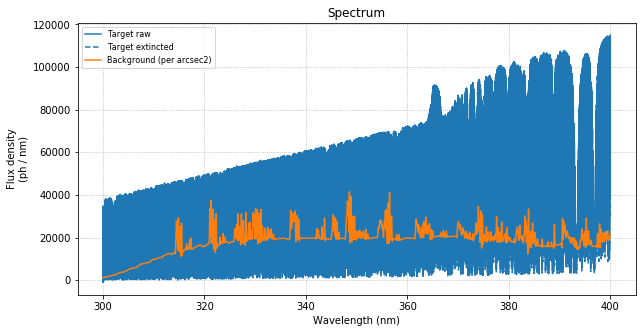

In [6]:
sim.spec_templ = 'custom'  # Template ('flat', 'PL', 'custom')
sim.spec_file = 'Science_Spectra/flux_D_m1_0.spec-2col.txt'  # Path to file

sim.mag_syst = 'Vega'  # System ('Vega')
sim.mag_band = 'U'  # Band ('U', 'B', 'V', 'R', 'I', 'J', 'H', 'K' for Vega)
sim.targ_mag = 21  # Magnitude

sim.qso_zem = None  # Emission redshift
sim.qso_lya_abs = False  # Lyman-alpha absorption

sim.airmass = 1.16  # Airmass
sim.pwv = 2.5  # Precipitable water vapor
sim.moond = 0  # Days from new moon
try:
    %run -i SkyCalc_Call.py  # Uncomment this to skip call to SkyCalc
except:
    sim.bckg_mag = 22.5 # Background magnitude
    
sim.texp = 3600*au.s  # Exposure time
sim.spec_in()

### PSF and slices

In [ ]:
sim.psf_func = 'gaussian'  # Function to represent the PSF ('tophat', 'gaussian')
sim.seeing = 0.87*au.arcsec  # Seeing

sim.slice_n = 6  # Number of slices
sim.slice_length = 10*au.arcsec  # Length of the slice
sim.slice_width = 0.25*au.arcsec  # Width of the slice
sim.psf()

### Spectral format

In [ ]:
sim.ccd_gain = 1.1*au.photon/au.adu  # Gain (i.e. conversion from ADU to photons)
sim.ccd_ron = 2*au.photon / sim.ccd_gain  # Read-out noise (in ADU)
sim.ccd_dark = 3*au.photon/au.h / sim.ccd_gain  # Dark current (in ADU per unit time)
sim.ccd_xsize = 6144*au.pixel  # X size of the CCD 
sim.ccd_ysize = 6144*au.pixel  # Y size of the CCD
sim.pix_xsize = 15*au.micron  # X size of the pixels
sim.pix_ysize = 15*au.micron  # Y size of the pixels
sim.ccd_xbin = 1  # X binning of the CCD
sim.ccd_ybin = 1  # Y binning of the CCD

sim.arm_n = 2  # Number of arms
if sim.arm_n == 1:
    sim.wave_d = []*au.nm  # Wavelength of dichroich
if sim.arm_n == 2:
    sim.wave_d = [347.5]*au.nm  # Wavelength of dichroich
    sim.wave_d_shift = 2*au.nm  # Shift of the CCD edges w.r.t. the dichroich wavelength
if sim.arm_n == 3:
    sim.wave_d = [335, 362.5]*au.nm  # Wavelengths of dichroichs
    sim.wave_d_shift = 12*au.nm  # Shift of the CCD edges w.r.t. the dichroich wavelengths
    
sim.eff_wave = [300, 320, 340, 360, 380, 400]*au.nm  # Wavelengths used to model efficiency
sim.eff_adc = [0.88, 0.94, 0.96, 0.96, 0.95, 0.94]  # ADC efficiency
sim.eff_slc = [0.94, 0.97, 0.98, 0.98, 0.97, 0.96]  # Slicer efficiency
sim.eff_dch = [0.88, 0.94, 0.96, 0.96, 0.95, 0.94]  # Dichroics efficiency
sim.eff_spc = [0.79, 0.89, 0.94, 0.94, 0.92, 0.90]  # Spectrograph efficiency
if sim.arm_n == 1:
    sim.eff_grt = [0.75, 0.86, 0.92, 0.89, 0.83, 0.74]  # Grating efficiency
if sim.arm_n == 2:
    sim.eff_grt = [0.85, 0.92, 0.90, 0.89, 0.92, 0.88]  # Grating efficiency
if sim.arm_n == 3:
    sim.eff_grt = [0.86, 0.92, 0.90, 0.91, 0.92, 0.90]  # Grating efficiency
sim.eff_ccd = [0.55, 0.75, 0.85, 0.85, 0.80, 0.78]  # CCD QE

if sim.arm_n == 1:
    sim.disp_wave = [[305, 320, 340, 360, 380, 395]]*au.nm  # Wavelengths used to model dispersion
    sim.disp_sampl = [[8.7e-3, 8.5e-3, 8.3e-3, 8.1e-3, 7.9e-3, 7.7e-3]]*au.nm/au.pixel  # Dispersion sampling on CCD
    sim.disp_resol = [[1.45e4, 1.65e4, 1.85e4, 2.05e4, 2.25e4, 2.45e4]]  # Resolution
if sim.arm_n == 2:
    sim.disp_wave = [[305, 320, 340], [360, 380, 395]]*au.nm  # Wavelengths used to model dispersion
    sim.disp_sampl = [[8.1e-3, 7.85e-3, 7.4e-3], [8.8e-3, 8.46e-3, 8.0e-3]]*au.nm/au.pixel  # Dispersion sampling on CCD
    sim.disp_resol = [[1.7e4, 1.9e4, 2.1e4], [1.8e4, 2.0e4, 2.2e4]]  # Resolution
if sim.arm_n == 3:
    sim.disp_wave = [[305, 325], [340, 360], [375, 395]]*au.nm  # Wavelengths used to model dispersion
    sim.disp_sampl = [[8.25e-3, 8.0e-3], [8.45e-3, 8.1e-3], [8.65e-3, 8.2e-3]]*au.nm/au.pixel  # Dispersion sampling on CCD
    sim.disp_resol = [[1.7e4, 1.9e4], [1.85e4, 2.05e4], [2.0e4, 2.2e4]]  # Resolution    
sim.spat_scale = 0.25*au.arcsec/(30*au.micron)  # Spatial scale

sim.slice_gap = 40*au.pixel  # Gap between the slices
sim.ccd()

### Output spectrum

In [ ]:
sim.extr_func = 'sum'  # Function for extracting the spectrum ('sum', 'opt' [very slow and not well tested])

sim.snr_sampl = 1*au.nm  # Data points per SNR point

sim.spec_draw()